%Porject 15cr (Naeim Rashidfarokhi - Deepthi H Venkataramana)

This code is based on Equations 2 and 3 in Lecture notes nbr.17 by Aaron Clauset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools as itt # to generate combinations
import igraph as ig

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Input data1

Enter the nbr of groups:2
IGRAPH UN-- 6 7 -- 
+ attr: name (v)


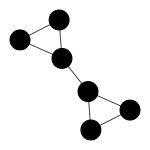

In [3]:
k = input("Enter the nbr of groups:")
# k = 6
## PLEASE unlock the dataset below with k=2 to check the accracy of code against values in Lecture 17!
vtx = np.array((0,1,2,3,4,5))
edges = np.array([[0,1], [0,2], [1,2], [2,3], [3,4], [3,5], [4,5]])

# Smaller graph to check the code!
# vtx = np.array(range(11))
# edges = np.array([[0,1], [0,2], [1,2], [10,3], [3,4], [3,5], [4,5],[6,7], [7,3], [6,4], [6,5], [0,9], [3,8], [7,8], [0,3], [4,2], [1,9]])

# Source for dataset below: https://github.com/junipertcy/bipartiteSBM
# vtx = np.array(range(32))
# edges = np.array([[0,23],[0,24],[0,28],[0,30],[1,25],[1,26],[1,27],[1,28],[1,29],[1,30],[2,26],[2,28],[2,29],[3,26],[3,28],[3,29],[4,25],[4,26],[4,28],[4,29],[4,30],[5,19],[5,21],[5,22],[5,23],[5,24],[5,25],[5,26],[5,27],[5,28],[5,29],[5,31],[6,15],[6,16],[6,17],[6,19],[6,20],[6,21],[6,22],[6,28],[7,15],[7,16],[7,17],[7,18],[7,19],[7,20],[7,21],[7,22],[7,25],[7,26],[7,27],[7,29],[7,30],[7,31],[8,14], [8, 15], [8, 16], [8, 17],[8, 18], [8, 19], [8, 27], [8, 28], [8, 29], [8, 30],[9, 17], [9, 18], [9, 21],[10, 16], [10, 17], [10, 21],[11, 14], [11, 16], [11, 17], [11, 18], [11, 20], [11, 21],[12, 16], [12, 18], [12, 21],[13, 14], [13, 15], [13, 16], [13, 17], [13, 18], [13, 20]])

# vtx = np.array(range(35))
# edges = np.array([[2, 1],[3, 1],[3, 2],[4, 1], [4, 2], [4, 3],[5, 1],[6, 1],[7, 1], [7, 5], [7, 6],[8, 1],[8, 2], [8, 3], [8, 4],[9, 1],[9, 3],[10, 3],[11, 1],[11, 5], [11, 6],[12, 1],[13, 1], [13, 4],[14, 1], [14, 2], [14, 3], [14, 4],[17, 6], [17, 7],[18, 1], [18, 2],[20, 1], [20, 2],[22, 1], [22, 2],[26, 24], [26, 25],[28, 3], [28, 24], [28, 25],[29, 3],[30, 24], [30, 27],[31, 2], [31, 9], [32, 1], [32, 25], [32, 26], [32, 29],[33, 3], [33, 9], [33, 15], [33, 16], [33, 19], [33, 21], [33, 23], [33, 24], [33, 30], [33, 31], [33, 32],[34, 9], [34, 10], [34, 14], [34, 15], [34, 16], [34, 19], [34, 20], [34, 21], [34, 23], [34, 24], [34, 27], [34, 28], [34, 29], [34, 30], [34, 31], [34, 32], [34, 33]])

g = ig.Graph()
g.add_vertices(list(range(len(vtx))))
g.add_edges(edges)
ig.summary(g)
ig.plot(g, bbox=(0, 0, 150, 150), vertex_color='black')

The code to find all combinations of a vertex set is inspired from discussion here: 
https://stackoverflow.com/questions/39192777/how-to-split-a-list-into-n-groups-in-all-possible-combinations-of-group-length-a
A useful explanation to understand the code below: https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do

In [4]:
# All non-unique combinations prepared for undirected graphs
def k_groups_sorted(vertex_seq, k):

    n = len(vertex_seq)
    groups = []  # a list of lists, currently empty

    if k>n:
        print(f'Division nbr was bigger than the nbr of vertices. \nThe code continued with maximum nbr of devision which was one vertex per group.')
    
    def generate_partitions(i):
        if i >= n:
            yield list(map(tuple, groups))
        else:
            if n - i > k - len(groups):
                for group in groups:
                    group.append(vertex_seq[i])
                    yield from generate_partitions(i + 1)
                    group.pop()

            if len(groups) < k:
                groups.append([vertex_seq[i]])
                yield from generate_partitions(i + 1)
                groups.pop()

    result = generate_partitions(0)

    # Sort the parts in each partition in shortlex order
    result = [sorted(parts, key = lambda x: (len(x), x)) for parts in result]
    
    # Sort partitions by the length of each part, then lexicographically.
    result = sorted(result, key = lambda parts: (*map(len, parts), parts))

    return result

def standard_SBM(intra_exist, inter_exist, intra_nbr_tot, inter_nbr_tot)

In [5]:
# 'combs varaible' holds all graph combinations
combs = k_groups_sorted(vtx, int(k))
print(f'Number of combinations: {len(combs)}')
# print(f'The first vertex combination:{combs}')
# print(type(combs))

Number of combinations: 31


prepare_possible_edges(combinations, k); Maximum Likilihood Estimation

In [6]:
# Parameters are a list of list for all combinations plus k as the nbr of communities
def prepare_possible_edges(combinations, k):
    nbr_comb = len(combinations)
    print(f'Number of combinations: {nbr_comb}')
    
    # validity check for nbr of groups (k)
    all_vertices = sum([len(i) for i in combinations[0]])           
    if k > all_vertices:
        k = all_vertices
    
    ### Number of vertex and possible intra edges in each group for all combinations
    vtx_nbr_all_combinations = []
    nbr_intra_edges_all_combinations = []
    
    group_vtx_one_comb = []
    intra_edges_one_comb = []
    
    for comb in combinations:
        for i in range(k):
            gp_len = len(comb[i])
            
            group_vtx_one_comb.append(gp_len)
            intra_one_group = int(gp_len * (gp_len - 1) / 2)
            
            # To solve 0/0 problem in case of 1 point in a group           
            if intra_one_group == 0:
                intra_one_group = 1
            
            intra_edges_one_comb.append(intra_one_group)
        
        vtx_nbr_all_combinations.append(group_vtx_one_comb)
        nbr_intra_edges_all_combinations.append(intra_edges_one_comb)
              
        group_vtx_one_comb = []
        intra_edges_one_comb = []
    
    print(f'Sample graph:{combinations[0]}')
    print(f'Number of vertices in each group/[combination]:\n{vtx_nbr_all_combinations[0]}\n')
    print(f'Total number of intra edges:\n{nbr_intra_edges_all_combinations[0]}\n')
    
    inter_edges_one_comb = []
    nbr_inter_edges_all_combinations = []
    
    ### Total nbr of edges between groups (binomial inter-edges)
    for comb in vtx_nbr_all_combinations:
        for i in list(itt.combinations(comb, 2)):

            inter_edge = i[0]*i[1]
            inter_edges_one_comb.append(inter_edge)
        
        nbr_inter_edges_all_combinations.append(inter_edges_one_comb)
        inter_edges_one_comb = []
    # print(f'Total number of inter edges:\n{nbr_inter_edges_all_combinations[0]}')        
 
    ### Finding inter and intra edge names based on their start-end vertex_ids in each combination
    inter_binomial_edge = [] # to keep possible inter edges between each two groups
    inter_edges_one_combination = []
    name_inter_edges_all_combinations = []
    
    intra_edges_one_group = [] # a list of all vertices inside a group
    name_intra_edges_one_comb = [] # a list of list for intra vertices in one graph combination
    name_intra_edges_all_combinations = []
    
    # for-loop to get a combination of network
    for comb in combinations:
        
        # for-loop to find inter-edges
        for binomial in list(itt.combinations(comb, 2)):
            inter_binomial_edge = list(itt.product(binomial[0], binomial[1]))
                
            # print(f'inter_binomial_edge:\n{inter_binomial_edge}\n')
            inter_edges_one_combination.append(inter_binomial_edge)
            inter_binomial_edge = []

        name_inter_edges_all_combinations.append(inter_edges_one_combination)
        inter_edges_one_combination = []
    
        # for-loop to find intra-edges
        for group in comb:
            if len(group) == 1:
                name_intra_edges_one_comb.append([])
            else:
                intra_edges_one_group = list(itt.combinations(group, 2))
                name_intra_edges_one_comb.append(intra_edges_one_group)
                intra_edges_one_group = []
            
        name_intra_edges_all_combinations.append(name_intra_edges_one_comb)
        name_intra_edges_one_comb = []
    
    vtx_nbr = np.array(vtx_nbr_all_combinations)
    intra_nbr = np.array(nbr_intra_edges_all_combinations)
    inter_nbr = np.array(nbr_inter_edges_all_combinations)
    inter_name = np.array(name_inter_edges_all_combinations)
    intra_name = np.array(name_intra_edges_all_combinations)  
                  
    print(f'\n{len(name_inter_edges_all_combinations)} sets of inter edges, one for each graph combination!')
    # print(f'The first combination, possible inter edges:\n{name_inter_edges_all_combinations[0]}\n')
    # print(f'The first combination, possible intra edges:\n{name_intra_edges_all_combinations[0]}')
    
    return vtx_nbr, intra_nbr, inter_nbr, inter_name, intra_name                            

In [7]:
# tot as total (all posibilities)
# intra_name is not used in the code, so dropped by: '_'
vtx_nbr_tot, intra_nbr_tot, inter_nbr_tot, inter_name_tot, _ = prepare_possible_edges(combs, int(k))

Number of combinations: 31
Sample graph:[(0,), (1, 2, 3, 4, 5)]
Number of vertices in each group/[combination]:
[1, 5]

Total number of intra edges:
[1, 10]


31 sets of inter edges, one for each graph combination!


ind_existing_edges(vtx_nbr_tot, inter_name_tot, combinations, edge_set)

In [8]:
# For all combinations, parameters are the number of vertices, inter edge names.
# Plus graph combinations and observed edge_sets
# Exisiting between two groups as refered 'expected degrees' in the literature
def find_existing_edges(vtx_nbr_tot, inter_name_tot, combinations, edge_set):
    
    print(f'Nbr of combinations: {vtx_nbr_tot.shape[0]} with {vtx_nbr_tot[0].size} groups!')
    ## Find correct group for existing entra edges
    
    group_entra_exist = []
    comb_entra_exist = []
    del_from_group = []
    del_from_comb = []
    
    entra_exist = 0
    degree = 0
    group_degree = []  
    comb_degree = []
    
    for comb in combinations:
        for group in comb:
            # print(group)
            intra_check = np.isin(edge_set, group)
            # print(intra_check)
            for i in range(len(intra_check)):
                if intra_check[i][0]==True and intra_check[i][1]==True:
                    entra_exist += 1
                    del_from_group.append(i)
                    # print(del_from_group)
                    
                if intra_check[i][0]==True:
                    degree += 1
                if intra_check[i][1]==True:
                    degree += 1  
                
            group_entra_exist.append(entra_exist)
            entra_exist = 0
            
            group_degree.append(degree)
            degree = 0
        
            # print("--*--")
            # print(del_from_group)
        
        comb_entra_exist.append(group_entra_exist)
        group_entra_exist = []
        del_from_comb.append(del_from_group)
        del_from_group = []
        
        comb_degree.append(group_degree)
        group_degree = []

    group_enter_exist = []
    comb_enter_exist = []
    # print(f'del_from_comb:{del_from_comb, len(comb_entra_exist)}')
    ## Find binomial correct group for existing inter-edges 
    enter_exist = 0
    for i in range(len(inter_name_tot)):
        #print(inter_name_tot[i])
        
        # removing intra-edges from edge set to keep only inter-edges
        enter_edge_set = np.delete(edge_set, del_from_comb[i], 0)
        # print(f'enter_edge_set:\n{enter_edge_set}') 
        

        for two_groups in inter_name_tot[i]:
            # print(f'vtx of two groups:{two_groups}')
            two_gps_vtx = list(set(np.array(two_groups).flatten()))
            # print(f'vtx of two groups flattern:{two_gps_vtx}')
            
            inter_check = np.isin(enter_edge_set, two_gps_vtx)
            # print(inter_check)
            
            for cer in inter_check:
                if cer[0]==True and cer[1]==True:
                    enter_exist += 1
            group_enter_exist.append(enter_exist)
            # print(f'enter_exist:{enter_exist}')
            enter_exist = 0
            
        comb_enter_exist.append(group_enter_exist)
        group_enter_exist = []       
    
    print(f'combinations[0]:{combinations[0]}')
    print(f'First combination, existing nbr of intra-edges in groups: {comb_entra_exist[0]}')
    print(f'First combination, existing nbr of inter-edges between groups: {comb_enter_exist[0]}')
    print(f'First combination, total degree in groups: {comb_degree[0]}')
    
    return np.array(comb_entra_exist), np.array(comb_enter_exist), np.array(comb_degree)

In [9]:
entra_exist, enter_exist, degree = find_existing_edges(vtx_nbr_tot, inter_name_tot, combs, edges)
# print(type(entra_exist))

Nbr of combinations: 31 with 2 groups!
combinations[0]:[(0,), (1, 2, 3, 4, 5)]
First combination, existing nbr of intra-edges in groups: [0, 5]
First combination, existing nbr of inter-edges between groups: [2]
First combination, total degree in groups: [2, 12]


def standard_SBM(intra_exist, inter_exist, intra_nbr_tot, inter_nbr_tot)

In [10]:
# A function to calculate maximum probability likelihood for all combinations
def standard_SBM(intra_exist, inter_exist, intra_nbr_tot, inter_nbr_tot):
     
    mle_value_comb = [] # to keep mle values for all combinations
    log_mle_value_comb = [] # to keep log(mle) values for all combinations
    k = entra_exist.shape[1] # nbr of groups
    
    for g in range(len(intra_exist)): # g for each graph(combination)
        SM = np.zeros([k,k]) # stochastic_matrix
        E = np.zeros([k,k]) # Expected edges as intra_exist for diagonal and inter_exist non_diagonal
        N = np.zeros([k,k]) # Possible edges
    
        E[np.diag_indices(k)] = intra_exist[g] # diagonal values
        N[np.diag_indices(k)] = intra_nbr_tot[g] # diagonal values
    
        # index production to save inter_exist and inter_exist_total values in correct cells
        for i in range(k):
            # print(f'i:{i}')
            for j in range(k):
                # print(f'j:{j}')
                if i < j:
                    # print(f'i,j:{i,j}')
                    E[i][j] = E[j][i] = inter_exist[g][i+j-1]
                    N[i][j] = N[j][i] = inter_nbr_tot[g][i+j-1]
    
        SM = E/N

        ## CALCULATION PART
        mle_value = 1 # Equestion 2, Lecture 17 (Aaron Clauset)
        log_mle_value = 0 # Equestion 3, Lecture 17 (Aaron Clauset)    
        for x in range(k):
            for y in range(k):
                if x <= y:
                    if (E[x][y] == 0): # case with 0 edges between a pair of groups 0^0 = 1! (SM[i][j])**E[i][j])
                        mle_value *= (1-SM[x][y])**N[x][y]
                        log_mle_value += (N[x][y])*np.log(N[x][y])-N[x][y]*np.log(N[x][y]) # E[i][j]*ln(E[i][j])

                    elif (N[x][y]-E[x][y] == 0): # case with all edges between a pair of groups
                        mle_value *= ((SM[x][y])**E[x][y])
                        log_mle_value += E[x][y]*np.log(E[x][y])-N[x][y]*np.log(N[x][y])

                    else:
                        mle_value *= ((SM[x][y])**E[x][y])*((1-SM[x][y])**(N[x][y]-E[x][y]))
                        log_mle_value += E[x][y]*np.log(E[x][y]) + (N[x][y]-E[x][y])*np.log(N[x][y]-E[x][y])-N[x][y]*np.log(N[x][y])
        
        mle_value_comb.append(mle_value)
        log_mle_value_comb.append(log_mle_value)
        
    
    print(f'First mle_value: {mle_value_comb[0], len(mle_value_comb)}')
    print(f'First log_mle_value: {log_mle_value_comb[0], len(log_mle_value_comb)}')    
    print("---")
    
    print(f'E:\n{E}')
    print(f'N:\n{N}')
    print(f'SM:\n{SM}')    

    return np.array(mle_value_comb),np.array(log_mle_value_comb)

In [11]:
all_mle_values, all_log_mle_values = standard_SBM(entra_exist, enter_exist, intra_nbr_tot, inter_nbr_tot)

First mle_value: (3.375e-05, 31)
First log_mle_value: (-10.29653014064574, 31)
---
E:
[[1. 4.]
 [4. 2.]]
N:
[[3. 9.]
 [9. 3.]]
SM:
[[0.33333333 0.44444444]
 [0.44444444 0.66666667]]


(31,)


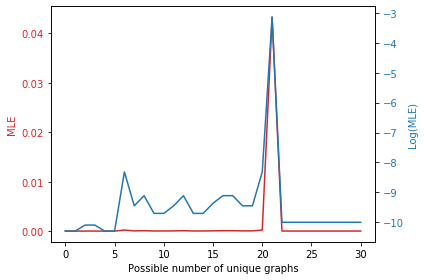

In [12]:
nbr_graphs = np.array(range(len(combs)))
print(nbr_graphs.shape)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Possible number of unique graphs')
ax1.set_ylabel('MLE', color=color)
ax1.plot(nbr_graphs, all_mle_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

 # instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Log(MLE)', color=color)
ax2.plot(nbr_graphs, all_log_mle_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [13]:
# Most possible graph
max_idx = list(np.where(all_mle_values == np.amax(all_mle_values)))
# max_idx = np.where(all_log_mle_values == np.amax(all_log_mle_values))
print(f'Graph number:{max_idx[0]}')
for i in range(len(max_idx[0])):
    print(f'Combination{i+1}: {combs[max_idx[0][i]]}')
    print(f' -> MLE: {all_mle_values[max_idx[0][i]]}')
    print(f' -> log(MLE): {all_log_mle_values[max_idx[0][i]]}')
final_groups = combs[max_idx[0][i]]
print(f'Final: {type(final_groups), len(final_groups)} groups!')

Graph number:[21]
Combination1: [(0, 1, 2), (3, 4, 5)]
 -> MLE: 0.043304927014327296
 -> log(MLE): -3.1394888625872888
Final: (<class 'list'>, 2) groups!


maximum degree:3 at vertex/vertices:[2, 3]


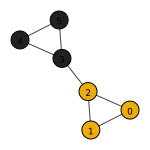

In [14]:
# igraph for visualization
import random
colors = list((ig.drawing.colors.known_colors).keys())

my_colors = []
for i in range(len(final_groups)):
    my_colors.append(random.choice(colors))
    
# print(my_colors, type(my_colors), len(my_colors))
g.vs["group_nbr"] = 0

# to find related group for each vertex
for i in range(len(vtx)):
    for j in range(len(final_groups)):
        if i in final_groups[j]:
            g.vs[i]["group_nbr"] = j
# g.vs["group_nbr"]

visual_style = {}
visual_style["vertex_size"] = 18
visual_style["vertex_label"] = g.vs["name"]
visual_style["vertex_color"] = [my_colors[group_nbr] for group_nbr in g.vs["group_nbr"]]
visual_style["layout"] = "kk"
visual_style["vertex_label_size"] = 9
visual_style["bbox"] = (150, 150)

print(f'maximum degree:{g.maxdegree()} at vertex/vertices:{g.vs.select(_degree = g.maxdegree())["name"]}')
ig.plot(g, **visual_style)

In [15]:
visual_style["vertex_label_size"] = 12
visual_style["vertex_size"] = 25
visual_style["bbox"] = (300, 300)
ig.plot(g, "SBM_standard.png", **visual_style);

In [16]:
# print(f'Edge betweenness:{g.edge_betweenness()}')

## Degree-Corrected SBM

In [17]:
def degree_corrected_SMB(entra_possible, enter_possible, entra_exist, enter_exist, gp_degree):
    
    # print(f'1: entra_possible:{entra_possible}')
    # print(f'1: enter_possible:{enter_possible}') 
        
    k = entra_possible.size # nbr of groups
    # print(f'Number of groups:{k}')
    m = sum(entra_exist) + sum(enter_exist)
    # print(f'All edges in the network:{m}')

    E = np.zeros([k,k]) # As entra_possible for diagonal and enter_possible non_diagonal
    E[np.diag_indices(k)] = entra_possible # diagonal values
    
    # index production to save enter_possible values in correct cells
    itr = 0
    for i in range(k-1):
        for j in range(k):
            if i < j:
                E[i][j] = E[j][i] = enter_possible[itr]
                #print(f'E[{i}][{j}] = E[{j}][{i}] = {enter_possible[itr]}, itr:{itr}')
                itr +=1
    
    # print(f'Total edges:\n{E}')
    # print(f'entra_possible:{entra_possible}')
    # print(f'enter_possible:{enter_possible}')    
    D = np.zeros([k,k]) # D for matrix of total degrees in each group
    
    # print(f'gp_degree:{gp_degree}')
    D[np.diag_indices(k)] = gp_degree           
    # print(f'Degree:\n{D}')
    
    ## CALCULATION PART
    m2 = 2 * m
    # print(f'm2:{m2}\n--*--')
    
    dc_mle = 0 #equation 10 from lecture 17
    for x in range(k):
        for y in range(k):
            if (E[x][y] == 0):
                # print(f'2-> i:{i},j{j}:E=0!')
                continue
            else:
                if x == y:
                    p_k = (E[x][y] * 2) / m2
                    dc_mle += p_k * np.log(p_k /((D[x][x]/m2) * (D[y][y]/m2)))
                    # print(f'3-> x:{x},y:{y}, E:{E[x][y]}')
                elif x < y:
                    p_k = E[x][y] / m2
                    dc_mle += p_k * np.log(p_k /((D[x][x]/m2) * (D[y][y]/m2)))
                    # print(f'4-> x:{x},y:{y}, E:{E[x][y]}')
                    
    # print(f'dc_mle:{dc_mle}')
    return dc_mle

In [18]:
all_dc_mle = []
for i in range(len(entra_exist)):
    #print(f"{i}---")
    dc_mle = degree_corrected_SMB(entra_exist[i], enter_exist[i], entra_exist[i], enter_exist[i], degree[i]) # intra_nbr_tot[i], inter_nbr_tot[i]
    all_dc_mle.append(dc_mle)
    #print(f"---{dc_mle}")
    #i += 1
    #break

In [19]:
# raise SystemExit("OK! Stop right there!")

(31,)


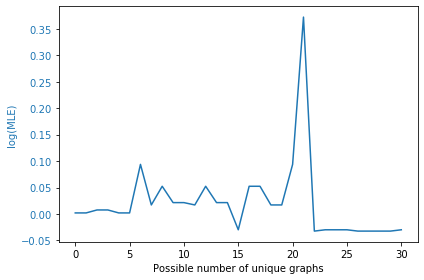

In [20]:
nbr_graphs = np.array(range(len(combs)))
print(nbr_graphs.shape)

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Possible number of unique graphs')
ax1.set_ylabel('log(MLE)', color=color)
ax1.plot(nbr_graphs, all_dc_mle, color=color)
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [21]:
# Most possible graph
max_idx_dc = list(np.where(all_dc_mle == np.amax(all_dc_mle)))
print(f'Graph number:{max_idx_dc[0]}')
for i in range(len(max_idx_dc[0])):
    print(f'Combination{i+1}: {combs[max_idx_dc[0][i]]}')
    print(f' -> MLE: {all_dc_mle[max_idx_dc[0][i]]}')
final_groups_dc = combs[max_idx_dc[0][i]]
print(f'Final: {final_groups_dc,type(final_groups_dc), len(final_groups_dc)} groups!')

Graph number:[21]
Combination1: [(0, 1, 2), (3, 4, 5)]
 -> MLE: 0.37251393144977674
Final: ([(0, 1, 2), (3, 4, 5)], <class 'list'>, 2) groups!


maximum degree:3 at vertex/vertices:[2, 3]


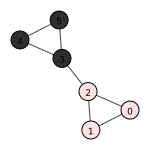

In [22]:
## igraph for visualization
import random
colors_dc = list((ig.drawing.colors.known_colors).keys())

my_colors_dc = []
for i in range(len(final_groups_dc)):
    my_colors_dc.append(random.choice(colors_dc))
    
# print(my_colors, type(my_colors), len(my_colors))
g.vs["group_nbr"] = 0

# to find related group for each vertex
for i in range(len(vtx)):
    for j in range(len(final_groups_dc)):
        if i in final_groups_dc[j]:
            g.vs[i]["group_nbr"] = j
# g.vs["group_nbr"]

visual_style = {}
visual_style["vertex_size"] = 18
visual_style["vertex_label"] = g.vs["name"]
visual_style["vertex_color"] = [my_colors_dc[group_nbr] for group_nbr in g.vs["group_nbr"]]
visual_style["layout"] = "kk"
visual_style["vertex_label_size"] = 9
visual_style["bbox"] = (150, 150)

print(f'maximum degree:{g.maxdegree()} at vertex/vertices:{g.vs.select(_degree = g.maxdegree())["name"]}')
ig.plot(g, **visual_style)